In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kymatio import Scattering2D
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage  as ndimage
from sklearn.cluster import KMeans

In [2]:
# Load the NIfTI file
month1 = nib.load('anita_1.nii')
month1_data = month1.get_fdata()
month1_data = month1_data/np.max(month1_data)

month3 = nib.load('anita_3.nii')
month3_data = month3.get_fdata()
month3_data = month3_data/np.max(month3_data)

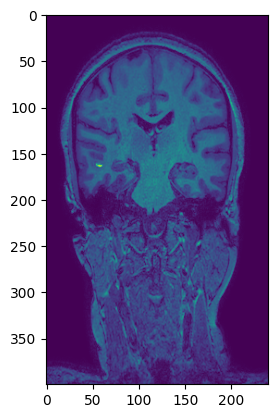

In [3]:
plt.imshow(month1_data[:,178,::-1].T)

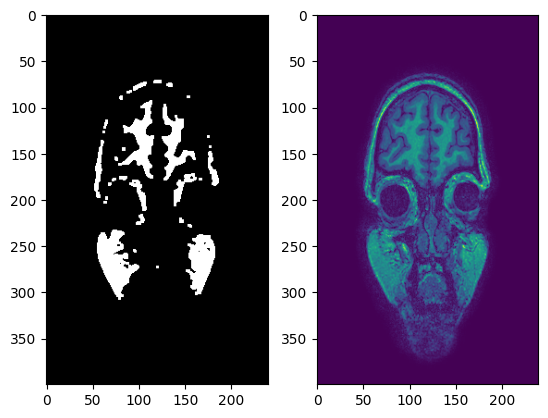

In [4]:
mri_volume = month1_data
# Assuming `mri_volume` is the 3D numpy array representing the brain MRI volume
# Step 1: Preprocessing - Gaussian Smoothing
smoothed_volume = ndimage.gaussian_filter(mri_volume, sigma=1)

# Step 2: Apply a Threshold (example threshold values, tune as needed)
th = 0.2
bone_threshold = (smoothed_volume >= th) & (smoothed_volume<th+0.13)

# Step 3: Morphological Operations to clean up the mask
# Convert the threshold result into a binary mask
bone_mask = bone_threshold.astype(np.uint8)

# Optional: Remove small objects, fill gaps
bone_mask = ndimage.binary_erosion(bone_mask, structure=np.ones((3, 3, 3)))
bone_mask = ndimage.binary_dilation(bone_mask, structure=np.ones((3, 3, 3)))

# Now `bone_mask` holds a binary volume with segmented bones

# plt.figure()
fig, ax = plt.subplots(1,2)
ax[0].imshow(bone_mask[:,300,::-1].T, cmap='gray')
ax[1].imshow(mri_volume[:,300,::-1].T)

c:\Users\abhiv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


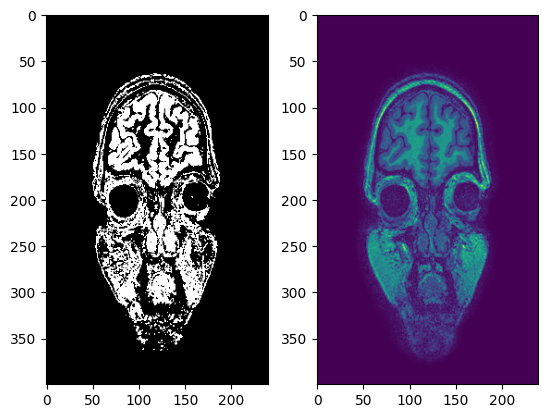

In [5]:

# Assuming `mri_volume` is the 3D numpy array representing the brain MRI volume
# Step 1: Flatten the 3D volume into a 1D array
flattened_volume = mri_volume.flatten().reshape(-1, 1)  # Reshape for clustering

# Step 2: Apply k-means clustering with k=2
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(flattened_volume)

# Step 3: Get the labels and reshape them back to the original 3D shape
labels = kmeans.labels_.reshape(mri_volume.shape)

# Step 4: Identify which cluster corresponds to bone
# To determine which cluster is bone, we can look at the mean intensity of each cluster
cluster_0_mean = np.mean(mri_volume[labels == 0])
cluster_1_mean = np.mean(mri_volume[labels == 1])

# Assume the cluster with the higher mean intensity corresponds to bone
bone_cluster = 0 if cluster_0_mean > cluster_1_mean else 1

# Step 5: Create a binary mask where bones are 1 and other tissues are 0
bone_mask = (labels == bone_cluster).astype(np.uint8)

# `bone_mask` is now a 3D binary array with bones segmented
fig, ax = plt.subplots(1,2)
ax[0].imshow(bone_mask[:,300,::-1].T, cmap='gray')
ax[1].imshow(mri_volume[:,300,::-1].T)


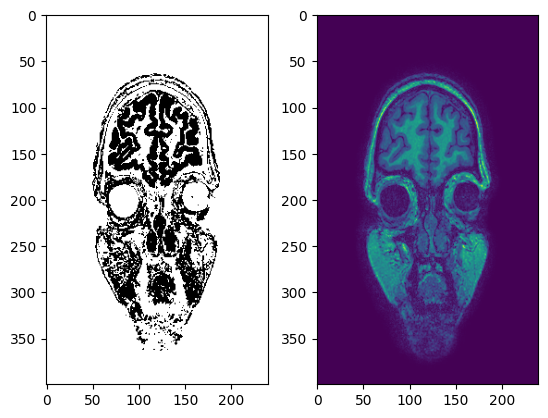

In [6]:
# Step 5: Create a binary mask where bones are 1 and other tissues are 0
unbone_mask = (labels != bone_cluster).astype(np.uint8)

# `bone_mask` is now a 3D binary array with bones segmented
fig, ax = plt.subplots(1,2)
ax[0].imshow(unbone_mask[:,300,::-1].T, cmap='gray')
ax[1].imshow(mri_volume[:,300,::-1].T)

c:\Users\abhiv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


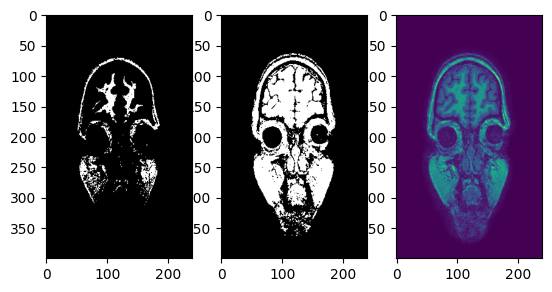

In [7]:

# Assuming `mri_volume` is the 3D numpy array representing the brain MRI volume
# Step 1: Flatten the 3D volume into a 1D array
flattened_volume = mri_volume.flatten().reshape(-1, 1)

# Step 2: Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(flattened_volume)

# Step 3: Get the labels and reshape them back to the original 3D shape
labels = kmeans.labels_.reshape(mri_volume.shape)

# Step 4: Sort clusters by mean intensity to identify bone cluster
# Calculate the mean intensity of each cluster
cluster_means = [np.mean(mri_volume[labels == i]) for i in range(3)]
# Sort clusters by mean intensity
sorted_clusters = np.argsort(cluster_means)

# Assume the highest mean intensity cluster is bone, and the lowest is background
background_cluster = sorted_clusters[0]
bone_cluster = sorted_clusters[2]  # Assuming the highest intensity corresponds to bone

# Step 5: Create binary masks
bone_mask = (labels == bone_cluster).astype(np.uint8)
other_tissues_mask = ((labels == sorted_clusters[1]) | (labels == bone_cluster)).astype(np.uint8)

# `bone_mask` is now a binary mask for bones, and `other_tissues_mask` includes all valued areas
fig, ax = plt.subplots(1,3)
ax[0].imshow(bone_mask[:,300,::-1].T, cmap='gray')
ax[1].imshow(other_tissues_mask[:,300,::-1].T, cmap='gray')
ax[2].imshow(mri_volume[:,300,::-1].T)

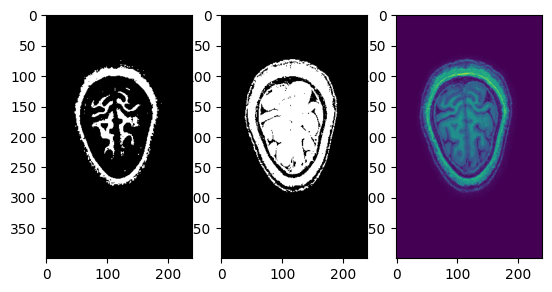

In [8]:
idx = 342
fig, ax = plt.subplots(1,3)
ax[0].imshow(bone_mask[:,:,idx].T, cmap='gray')
ax[1].imshow(other_tissues_mask[:,:,idx].T, cmap='gray')
ax[2].imshow(mri_volume[:,:,idx].T)

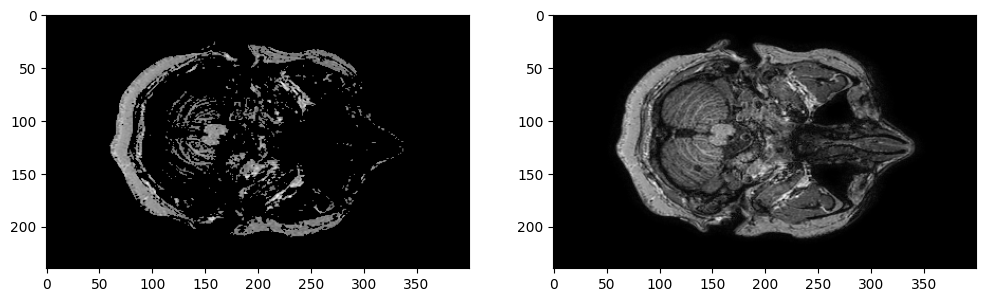

In [9]:
idx = 170
fig, ax = plt.subplots(1,2, figsize=(12,4))

sliced_bone_mask = bone_mask[:,:,idx]
sliced_mri_volume = mri_volume[:,:,idx]
smooth_bone_mask = ndimage.gaussian_filter(sliced_bone_mask*100, sigma=0)
# ax[0].imshow(bone_mask[:,:,idx], cmap='gray')
plt.set_cmap('gray')
ax[0].imshow(np.where(smooth_bone_mask!=0, sliced_mri_volume*smooth_bone_mask, 0))
# ax[1].imshow(other_tissues_mask[:,:,idx], cmap='gray')
ax[1].imshow(mri_volume[:,:,idx])